In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"Diwali Sales Data.csv",encoding="unicode_escape")

In [3]:
df.shape

(11251, 15)

In [4]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

User_ID               0.000000
Cust_name             0.000000
Product_ID            0.000000
Gender                0.000000
Age Group             0.000000
Age                   0.000000
Marital_Status        0.000000
State                 0.000000
Zone                  0.000000
Occupation            0.000000
Product_Category      0.000000
Orders                0.000000
Amount                0.106657
Status              100.000000
unnamed1            100.000000
dtype: float64

In [8]:
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [9]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
df["Amount"]=df["Amount"].astype(int)

In [13]:
df.Amount.dtype

dtype('int32')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [16]:
df[["Age",'Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## EDA

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

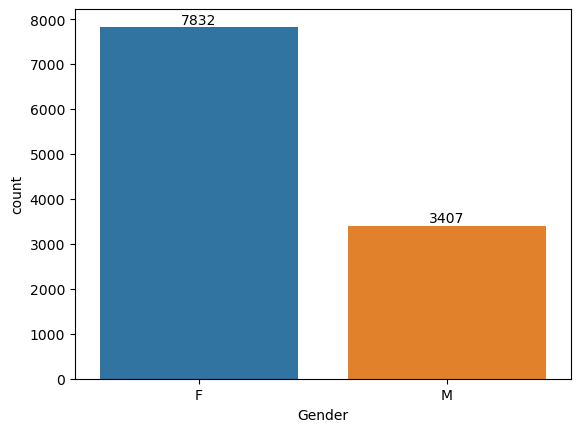

In [25]:
gen=sns.countplot(data=df,x="Gender")

for bar in gen.containers:
    gen.bar_label(bar)

##### from the above plot we can infer that  number of female count is more means that females by more product then  men.

In [31]:
gen_amount=df.groupby(["Gender"],as_index=False).agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False)
print(gen_amount)

  Gender    Amount
0      F  74335853
1      M  31913276


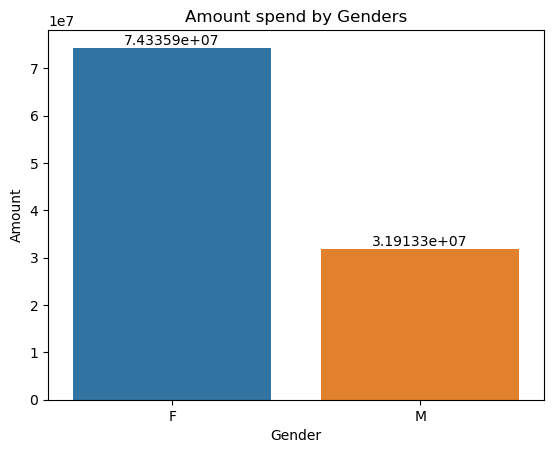

In [45]:
gen_amount=df.groupby(["Gender"],as_index=False).agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False)
a=sns.barplot(x='Gender',y='Amount',data=gen_amount)
plt.title('Amount spend by Genders')
for bar in a.containers:
    a.bar_label(bar)

#### from the above graph we get  that feamle spend more amount of money  in buying products .the purchase power of female is more.

## Age 

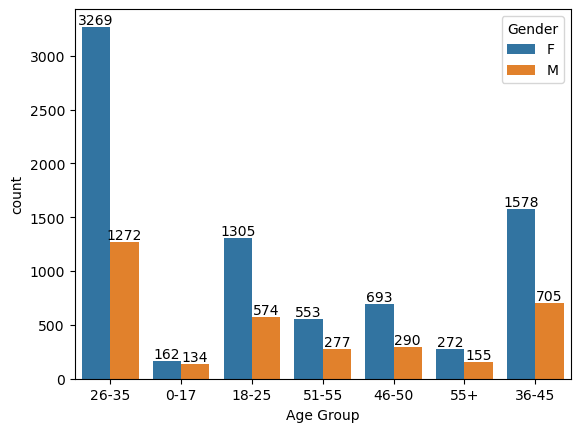

In [53]:
ag=sns.countplot(data=df,x="Age Group",hue='Gender')
for bar in ag.containers:
    ag.bar_label(bar)

#####  most product buy by the age group 26-35 and those are female.

In [68]:
amo=df.groupby('Age Group',as_index=False).agg({"Amount":"sum"}).sort_values(by="Amount",ascending=False).head(10)
amo

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

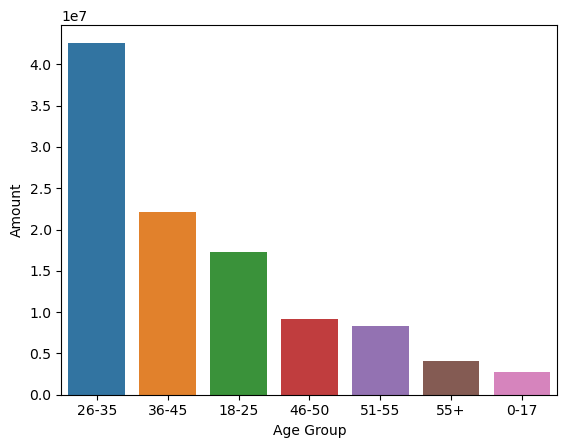

In [67]:
sns.barplot(x="Age Group",y='Amount',data=amo)

### State 

In [69]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [72]:
area=df.groupby(["State","Zone"]).agg({"Orders":"sum"}).sort_values(by='Orders',ascending=False)
sns.barplot(x="State",y="Orders",data=area)

,,Orders
State,Zone,
Uttar Pradesh,Central,4807
Maharashtra,Western,3810
Karnataka,Southern,3240
Delhi,Central,2740
Madhya Pradesh,Central,2252
Andhra Pradesh,Southern,2051
Himachal Pradesh,Northern,1568
Kerala,Southern,1137
Haryana,Northern,1109


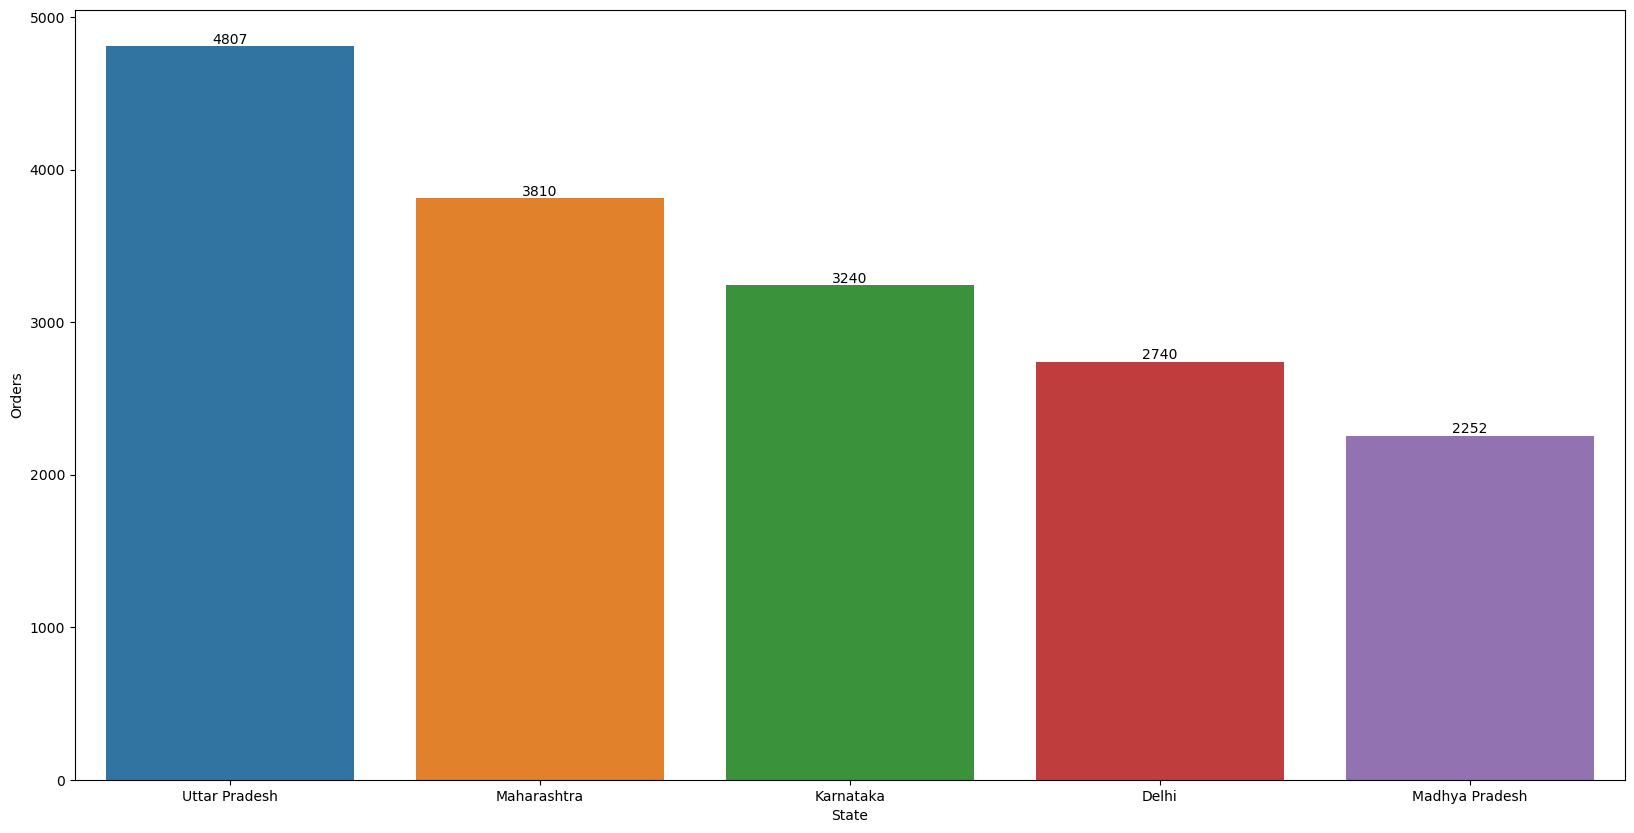

In [91]:
area=df.groupby(["State"],as_index=False).agg({"Orders":"sum"}).sort_values(by='Orders',ascending=False).head(5)
plt.figure(figsize=(20,10))
st=sns.barplot(x="State",y="Orders",data=area)
for bar in st.containers:
    st.bar_label(bar)

#####  from the above graph we can infer that (uttar pradesh, maharashtra, karnataka ) state has more no of orders.

### marital status 

In [92]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [93]:
df.groupby(["Marital_Status","Gender"]).agg({'Amount':"sum"}).sort_values(by="Amount",ascending=False)

,,Amount
Marital_Status,Gender,
0,F,43786646
1,F,30549207
0,M,18338738
1,M,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

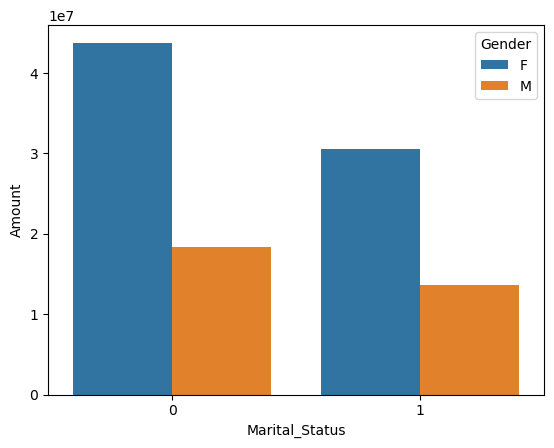

In [116]:
M_stat=df.groupby(["Marital_Status","Gender"],as_index=False).agg({'Amount':"sum"}).sort_values(by="Amount",ascending=False)
sns.barplot(data=M_stat,x='Marital_Status',y='Amount',hue="Gender")

#### from the above plot we can say that most buyers are married female they have more purchasing power.

## Occupation

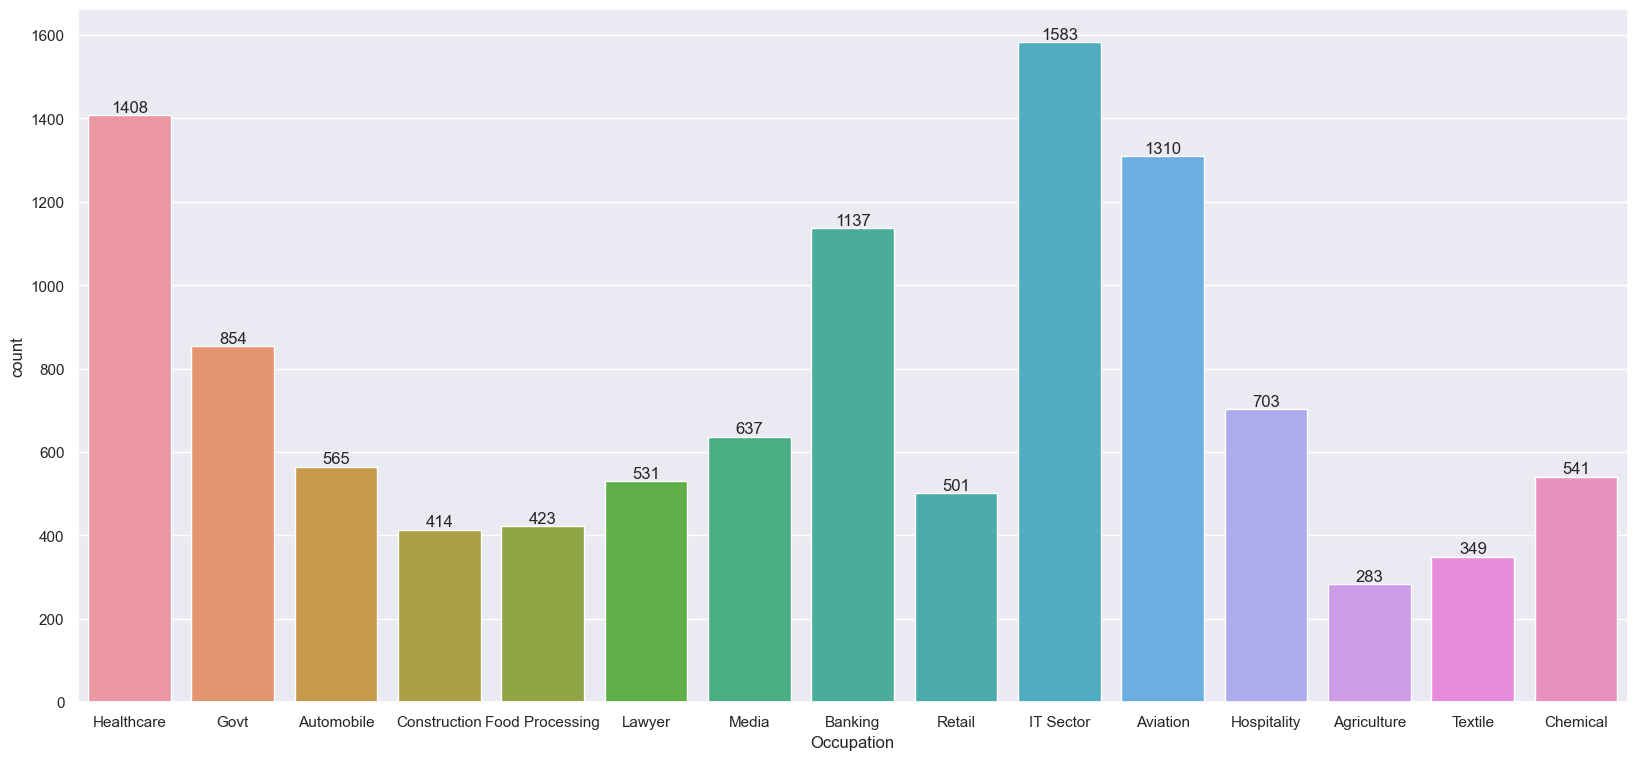

In [126]:
sns.set(rc={'figure.figsize':(20,9)})
lb=sns.countplot(data=df,x="Occupation")
for bar in lb.containers:
    lb.bar_label(bar)

#### most people are working in IT-sector

In [125]:
df.groupby(["Occupation"]).agg({"Amount":"sum"}).sort_values(by="Amount",ascending=False).head(10)

,Amount
Occupation,
IT Sector,14755079
Healthcare,13034586
Aviation,12602298
Banking,10770610
Govt,8517212
Hospitality,6376405
Media,6295832
Automobile,5368596
Chemical,5297436


<Axes: xlabel='Occupation', ylabel='Amount'>

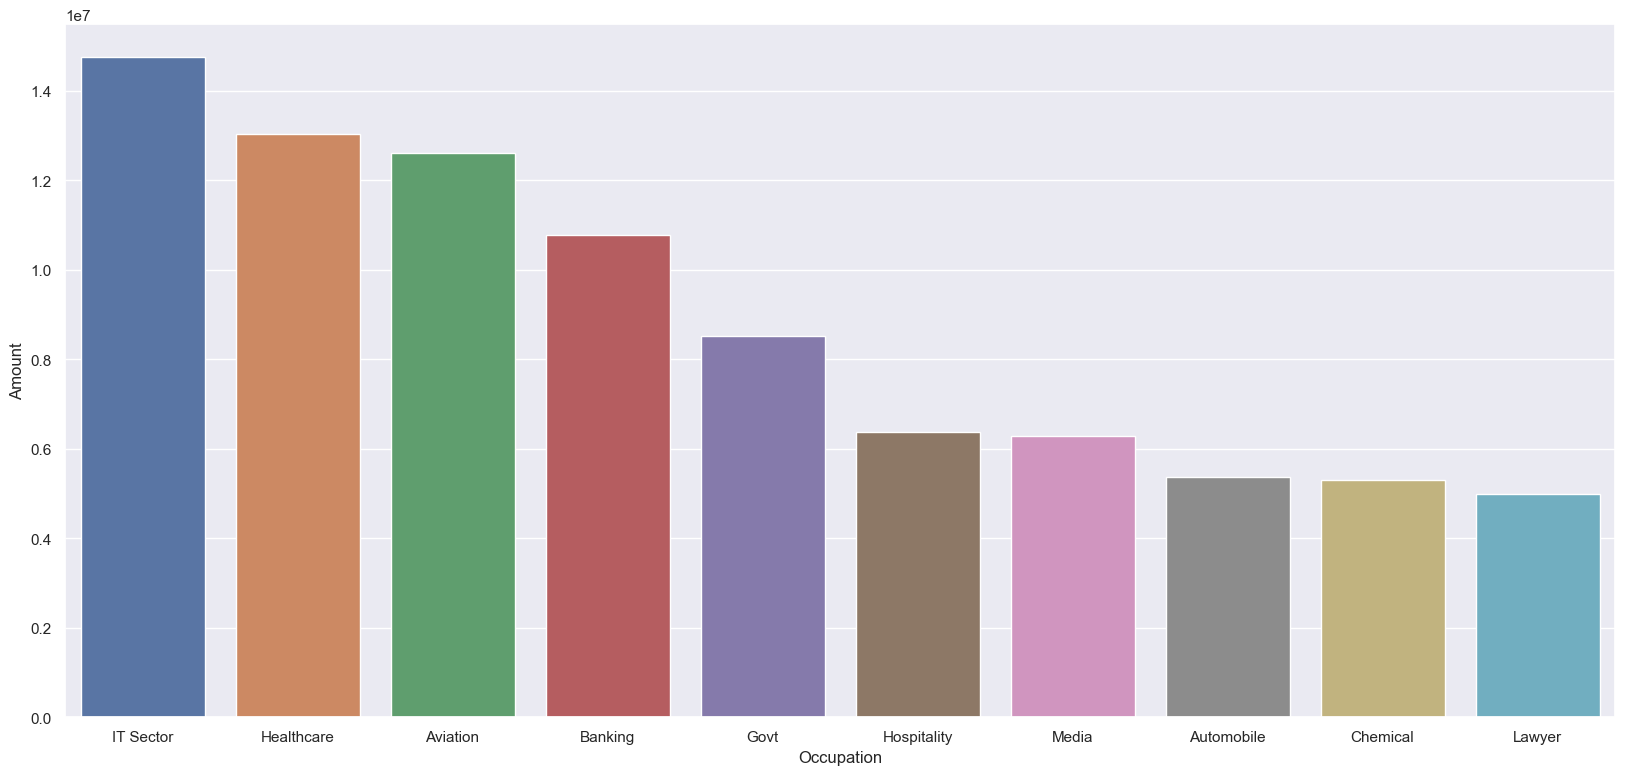

In [128]:
be=df.groupby(["Occupation"],as_index=False).agg({"Amount":"sum"}).sort_values(by="Amount",ascending=False).head(10)
sns.barplot(x="Occupation",y="Amount",data=be)

##### from the above graph we infer that most of the buyers are working at (IT ,HEALTHCARE,AVIATION) sector

## product category

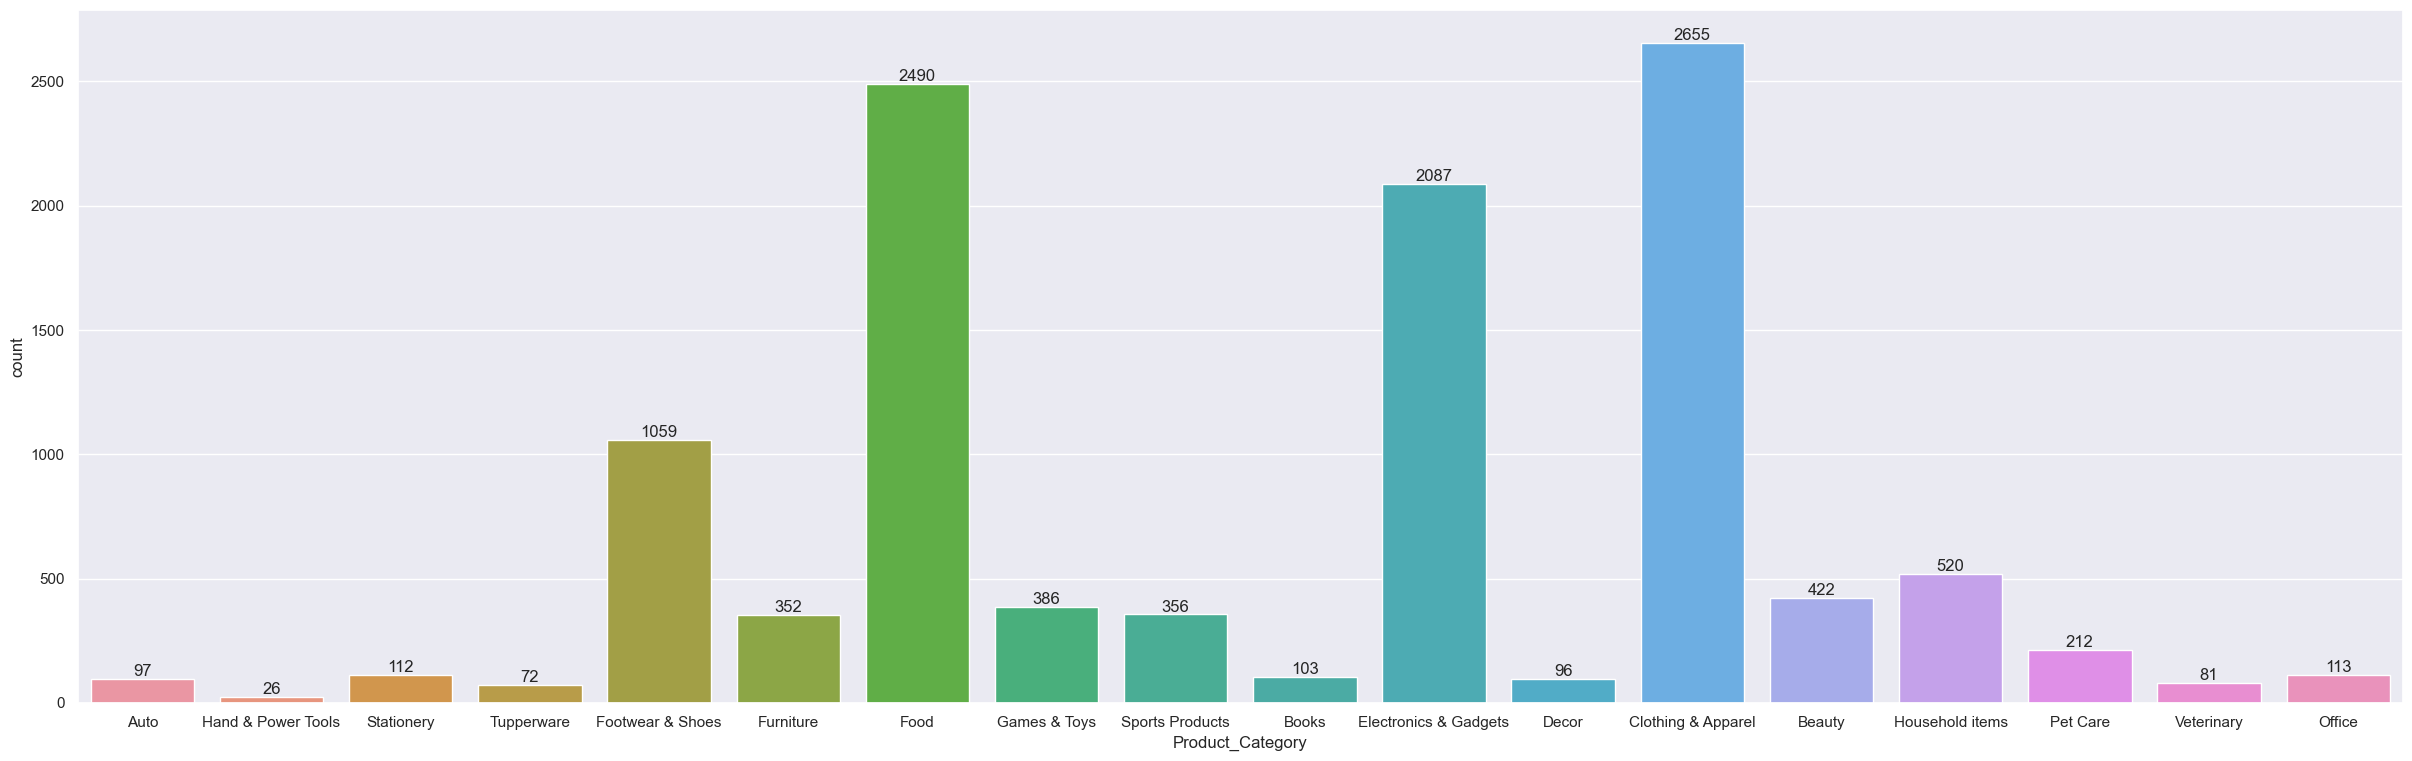

In [134]:
sns.set(rc={'figure.figsize':(30,9)})
v=sns.countplot(data=df,x="Product_Category")
for bar in v.containers:
    v.bar_label(bar)

 ##### from the above plot  we get to know that most people are buying cloth and apparel

In [131]:
df.groupby(["Product_Category"]).agg({"Amount":"sum"}).sort_values(by="Amount",ascending=False).head(10)

,Amount
Product_Category,
Food,33933883
Clothing & Apparel,16495019
Electronics & Gadgets,15643846
Footwear & Shoes,15575209
Furniture,5440051
Games & Toys,4331694
Sports Products,3635933
Beauty,1959484
Auto,1958609


<Axes: xlabel='Product_Category', ylabel='Amount'>

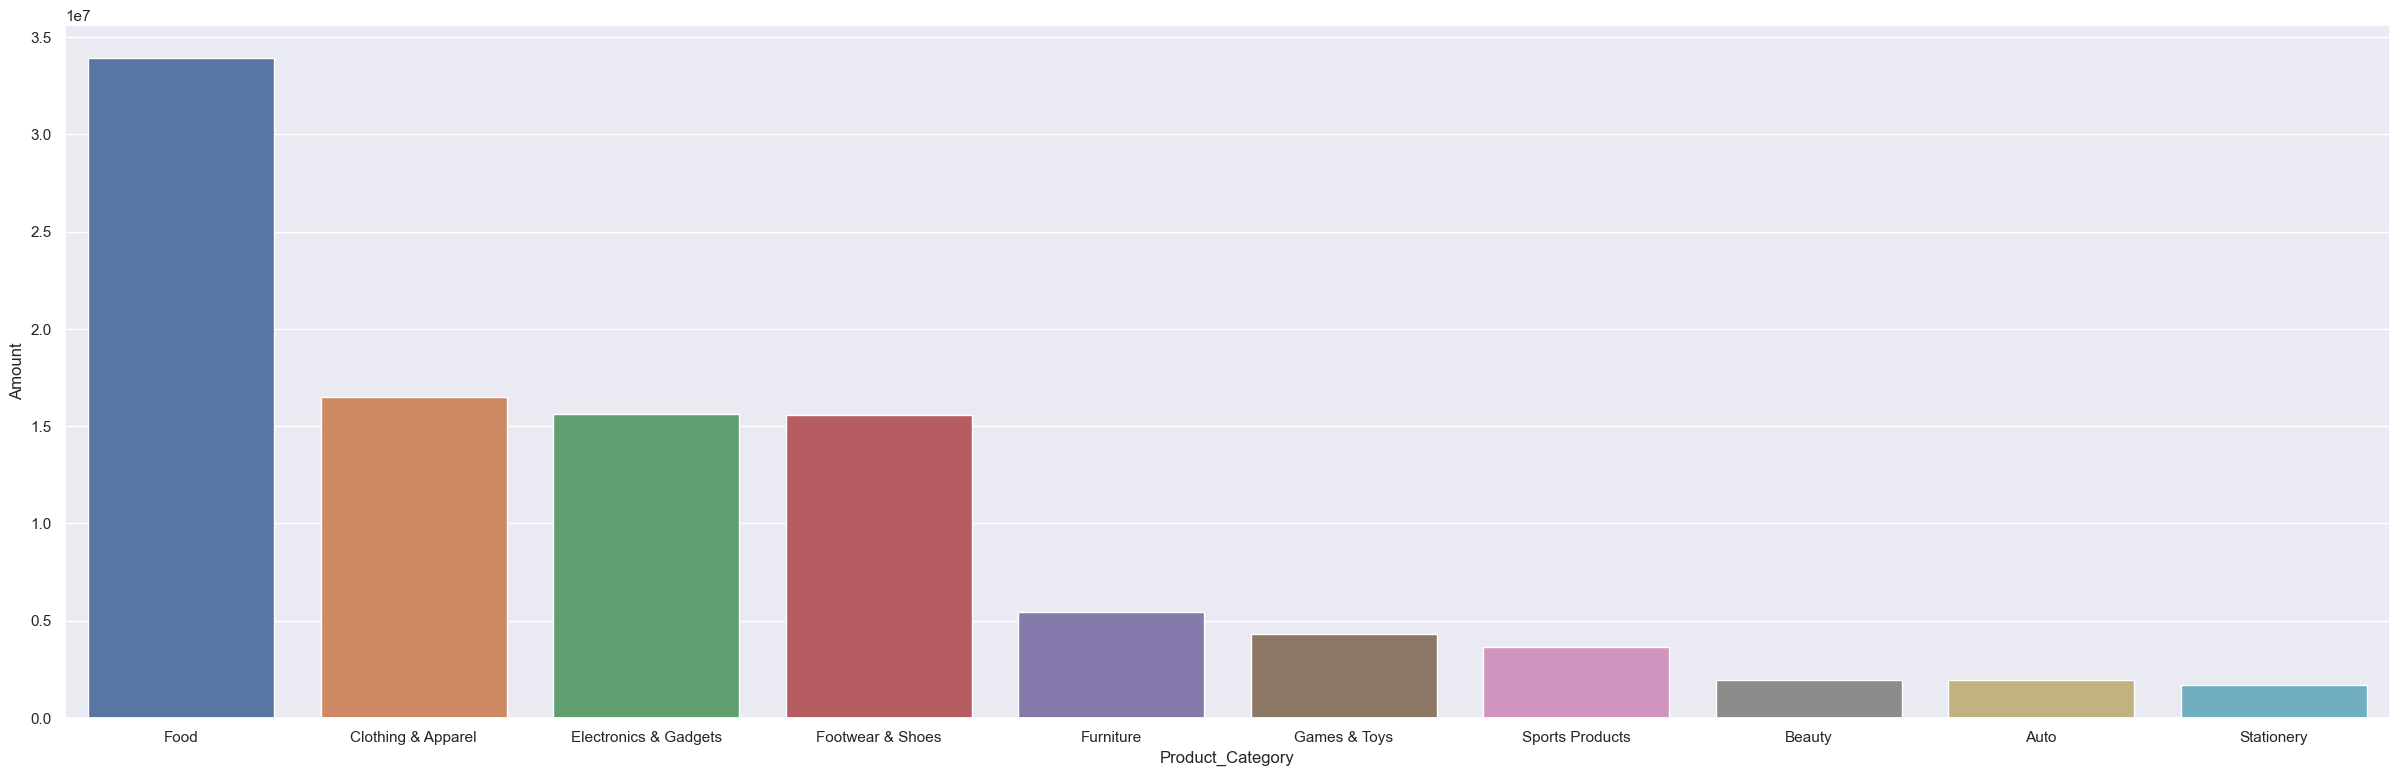

In [137]:
catgry=df.groupby(["Product_Category"],as_index=False).agg({"Amount":"sum"}).sort_values(by="Amount",ascending=False).head(10)
sns.barplot(x="Product_Category",y="Amount",data=catgry)

  ### from the above 2 group we can infer that most people are buying cloth and apparel but the most
  sells(product sold )from  FOOD, CLOTH ,  ELECTRONIC.

In [143]:
df.groupby(['Product_ID']).agg({"Orders":"sum"}).sort_values(by="Orders",ascending=False).head(5)

,Orders
Product_ID,
P00265242,127
P00110942,116
P00237542,91
P00184942,82
P00114942,79


##  conclusion

from this data we can conclude that Married Women whose age(26-35) years from Uttar Pradesh , Maharashtra,Karnataka, working in IT,Healthcar and aviation are more likely to buy product from Food, Clothing and Electronic category.